In [53]:
# Loading the necessary packages

# Core libraries for data handling and mathematics
import numpy as np
import pandas as pd
import math
from typing import List

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Preprocessing tools for scaling and handling missing values
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Statistical tools for data analysis
from scipy.stats import chi2_contingency

# Machine learning model evaluation metrics
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score,
    recall_score, f1_score, confusion_matrix
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [54]:
# Dataset
AVC_test_link = "/content/AVC_test.csv"
AVC_train_link = "/content/AVC_train.csv"
AVC_full_link = "/content/AVC_full.csv"

Salary_test_link = "/content/SalaryPrediction_test.csv"
Salary_train_link = "/content/SalaryPrediction_train.csv"
Salary_full_link = "/content/SalaryPrediction_full.csv"

# Loading Data into DataFrames
AVC_test_df = pd.read_csv(AVC_test_link)
AVC_train_df = pd.read_csv(AVC_train_link)
AVC_full_df = pd.read_csv(AVC_full_link)

Salary_test_df = pd.read_csv(Salary_test_link)
Salary_train_df = pd.read_csv(Salary_train_link)
Salary_full_df = pd.read_csv(Salary_full_link)

# Display info
AVC_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mean_blood_sugar_level    5110 non-null   float64
 1   cardiovascular_issues     5110 non-null   int64  
 2   job_category              5110 non-null   object 
 3   body_mass_indicator       4909 non-null   float64
 4   sex                       5110 non-null   object 
 5   tobacco_usage             5110 non-null   object 
 6   high_blood_pressure       5110 non-null   int64  
 7   married                   4599 non-null   object 
 8   living_area               5110 non-null   object 
 9   years_old                 5110 non-null   float64
 10  chaotic_sleep             5110 non-null   int64  
 11  analysis_results          4599 non-null   float64
 12  biological_age_index      5110 non-null   float64
 13  cerebrovascular_accident  5110 non-null   int64  
dtypes: float

# AVC Statistics

In [55]:
# Numerical Attributes Statistics
numerical_cols = ['mean_blood_sugar_level', 'body_mass_indicator', 'years_old', 'analysis_results', 'biological_age_index']

# Selecting continuous numerical columns
numerical_data = AVC_full_df[numerical_cols]

# Using describe() to obtain most of the desired statistics
description = numerical_data.describe()

# Reordering rows for a clearer presentation
description = description.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Converting the description into a table
description_df = description.T.reset_index()
description_df.columns = [
    'Attribute', 'Number of Exemples', 'Mean Value', 'Standard Deviation',
    'Minimum Value', '25% Percentile', 'Median (50% Percentile)',
    '75% Percentile', 'Maximum Value'
]

description_df

,Attribute,Number of Exemples,Mean Value,Standard Deviation,Minimum Value,25% Percentile,Median (50% Percentile),75% Percentile,Maximum Value
0,mean_blood_sugar_level,5110.0,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
1,body_mass_indicator,4909.0,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000
2,years_old,5110.0,46.568665,26.593912,0.080000,26.000000,47.000000,63.750000,134.000000
3,analysis_results,4599.0,323.523446,101.577442,104.829714,254.646209,301.031628,362.822769,756.807975
4,biological_age_index,5110.0,134.784256,50.399352,-15.109456,96.710581,136.374631,172.507322,266.986321


In [56]:
# Statistics for Categorical Attributes
categorical_cols = ['cardiovascular_issues', 'job_category', 'sex', 'tobacco_usage', 'high_blood_pressure', 'married', 'living_area', 'chaotic_sleep', 'cerebrovascular_accident']

# Creating a list to store the results
categorical_stats = []

# Calculating statistics for each categorical attribute
for col in categorical_cols:
    num_non_missing = AVC_full_df[col].notnull().sum()
    num_unique_values = AVC_full_df[col].nunique()
    categorical_stats.append([col, num_non_missing, num_unique_values])

# Creating a DataFrame to display the statistics
categorical_stats_df = pd.DataFrame(categorical_stats, columns=['Attribute', 'Number of Examples (no missing values)', 'Number of Unique Values'])

categorical_stats_df


,Attribute,Number of Examples (no missing values),Number of Unique Values
0,cardiovascular_issues,5110,2
1,job_category,5110,5
2,sex,5110,2
3,tobacco_usage,5110,4
4,high_blood_pressure,5110,2
5,married,4599,2
6,living_area,5110,2
7,chaotic_sleep,5110,2
8,cerebrovascular_accident,5110,2


# SalaryPrediction Statistics

In [57]:
# Statistics for Numerical Attributes
numerical_cols = ['fnl', 'hpw', 'gain', 'edu_int', 'years', 'loss', 'prod']

# Selecting continuous numerical columns
numerical_data = Salary_full_df[numerical_cols]

# Using describe() to obtain most of the desired statistics
description = numerical_data.describe()

# Reordering the rows for clear presentation
description = description.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Converting the description to a table
description_df = description.T.reset_index()
description_df.columns = [
    'Attribute', 'Number of Examples', 'Mean Value', 'Standard Deviation',
    'Minimum Value', '25% Percentile', 'Median (50% Percentile)',
    '75% Percentile', 'Maximum Value'
]

description_df


,Attribute,Number of Examples,Mean Value,Standard Deviation,Minimum Value,25% Percentile,Median (50% Percentile),75% Percentile,Maximum Value
0,fnl,9999.0,190352.902090,106070.862686,19214.0,118282.5,178472.0,237311.0,1455435.0
1,hpw,9199.0,40.416241,12.517356,1.0,40.0,40.0,45.0,99.0
2,gain,9999.0,979.853385,7003.795382,0.0,0.0,0.0,0.0,99999.0
3,edu_int,9999.0,14.262026,24.770835,1.0,9.0,10.0,13.0,206.0
4,years,9999.0,38.646865,13.745101,17.0,28.0,37.0,48.0,90.0
5,loss,9999.0,84.111411,394.035484,0.0,0.0,0.0,0.0,3770.0
6,prod,9999.0,2014.927593,14007.604496,-28.0,42.0,57.0,77.0,200125.0


In [58]:
# Statistics for Categorical Attributes
categorical_cols = ['relation', 'country', 'job', 'work_type', 'partner', 'edu', 'gender', 'race', 'gtype', 'money']

# Creating a list to store the results
categorical_stats = []

# Calculating statistics for each categorical attribute
for col in categorical_cols:
    num_non_missing = Salary_full_df[col].notnull().sum()
    num_unique_values = Salary_full_df[col].nunique()
    categorical_stats.append([col, num_non_missing, num_unique_values])

# Creating a DataFrame to display the statistics
categorical_stats_df = pd.DataFrame(categorical_stats, columns=['Attribute', 'Number of Examples (non-missing)', 'Number of Unique Values'])

categorical_stats_df


,Attribute,Number of Examples (non-missing),Number of Unique Values
0,relation,9999,6
1,country,9999,41
2,job,9999,14
3,work_type,9999,9
4,partner,9999,7
5,edu,9999,16
6,gender,9199,2
7,race,9999,5
8,gtype,9999,2
9,money,9999,2


# Handling Missing Values

In [59]:
# Selecting columns that require imputation
numerical_cols = ['body_mass_indicator', 'analysis_results']
categorical_cols = ['married']

# Creating copies of the DataFrame to keep modifications separate
AVG_imputed_df = AVC_train_df.copy()

# Univariate imputation for numerical attributes (using the mean)
numerical_imputer = SimpleImputer(strategy='mean')
AVG_imputed_df[numerical_cols] = numerical_imputer.fit_transform(AVC_train_df[numerical_cols])

# Univariate imputation for categorical attributes (using the most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
AVG_imputed_df[categorical_cols] = categorical_imputer.fit_transform(AVC_train_df[categorical_cols])

print("Result of univariate imputation using SimpleImputer:")
AVG_imputed_df.info()


Result of univariate imputation using SimpleImputer:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mean_blood_sugar_level    4088 non-null   float64
 1   cardiovascular_issues     4088 non-null   int64  
 2   job_category              4088 non-null   object 
 3   body_mass_indicator       4088 non-null   float64
 4   sex                       4088 non-null   object 
 5   tobacco_usage             4088 non-null   object 
 6   high_blood_pressure       4088 non-null   int64  
 7   married                   4088 non-null   object 
 8   living_area               4088 non-null   object 
 9   years_old                 4088 non-null   float64
 10  chaotic_sleep             4088 non-null   int64  
 11  analysis_results          4088 non-null   float64
 12  biological_age_index      4088 non-null   float64
 13  cerebrovas

In [60]:
# Selecting columns that require imputation
numerical_cols = ['hpw']
categorical_cols = ['gender']

# Creating copies of the DataFrame to keep modifications separate
Salary_imputed_df = Salary_train_df.copy()

# Univariate imputation for numerical attributes (using the mean)
numerical_imputer = SimpleImputer(strategy='mean')
Salary_imputed_df[numerical_cols] = numerical_imputer.fit_transform(Salary_imputed_df[numerical_cols])

# Univariate imputation for categorical attributes (using the most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
Salary_imputed_df[categorical_cols] = categorical_imputer.fit_transform(Salary_imputed_df[categorical_cols])

print("Result of univariate imputation using SimpleImputer:")
Salary_imputed_df.info()


Result of univariate imputation using SimpleImputer:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fnl        7999 non-null   int64  
 1   hpw        7999 non-null   float64
 2   relation   7999 non-null   object 
 3   gain       7999 non-null   int64  
 4   country    7999 non-null   object 
 5   job        7999 non-null   object 
 6   edu_int    7999 non-null   int64  
 7   years      7999 non-null   int64  
 8   loss       7999 non-null   int64  
 9   work_type  7999 non-null   object 
 10  partner    7999 non-null   object 
 11  edu        7999 non-null   object 
 12  gender     7999 non-null   object 
 13  race       7999 non-null   object 
 14  prod       7999 non-null   int64  
 15  gtype      7999 non-null   object 
 16  money      7999 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.0+ MB


# Frequency of labels in AVC dataset

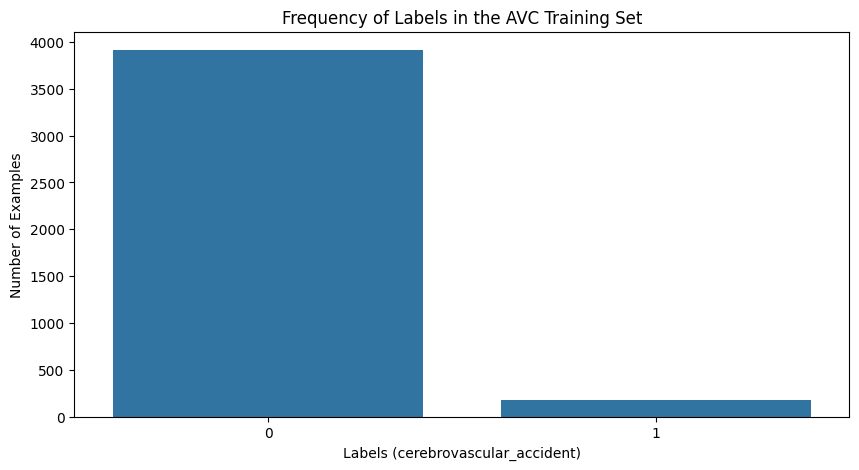

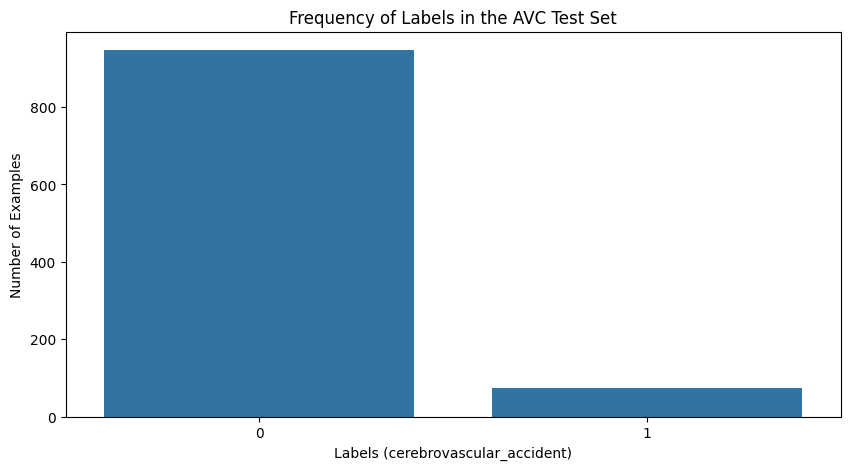

In [61]:
AVG_train_copy = AVG_imputed_df.copy()

# Plotting the frequency of labels in the training set
plt.figure(figsize=(10, 5))
sns.countplot(x='cerebrovascular_accident', data=AVG_train_copy)
plt.title('Frequency of Labels in the AVC Training Set')
plt.xlabel('Labels (cerebrovascular_accident)')
plt.ylabel('Number of Examples')
plt.show()

AVG_test_copy = AVC_test_df.copy()

# Plotting the frequency of labels in the test set
plt.figure(figsize=(10, 5))
sns.countplot(x='cerebrovascular_accident', data=AVG_test_copy)
plt.title('Frequency of Labels in the AVC Test Set')
plt.xlabel('Labels (cerebrovascular_accident)')
plt.ylabel('Number of Examples')
plt.show()


# Frequency of labels in SalaryPrediction dataset

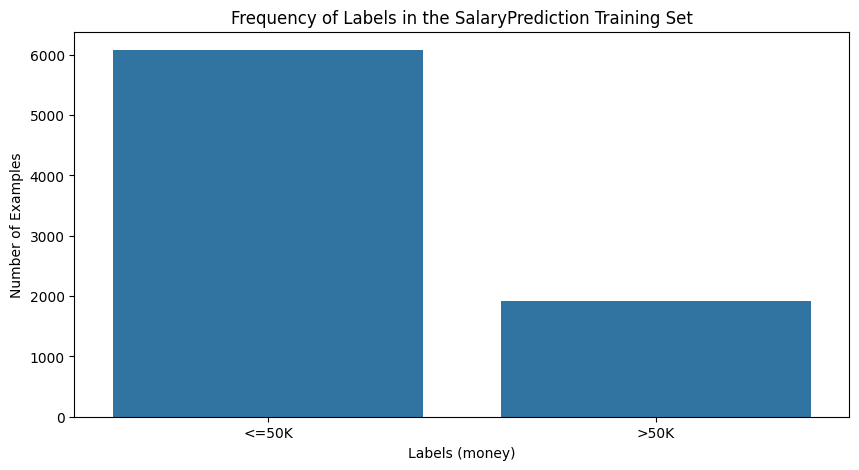

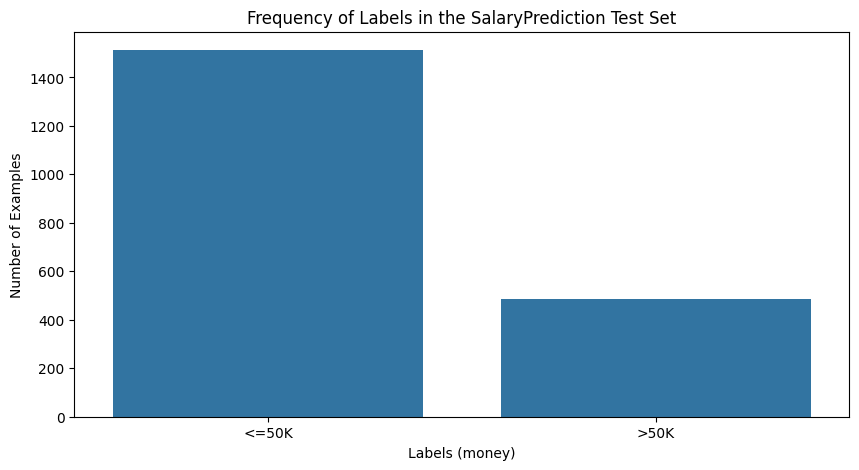

In [62]:
Salary_train_copy = Salary_imputed_df.copy()

# Creating the frequency plot for the training set
plt.figure(figsize=(10, 5))
sns.countplot(x='money', data=Salary_train_copy)
plt.title('Frequency of Labels in the SalaryPrediction Training Set')
plt.xlabel('Labels (money)')
plt.ylabel('Number of Examples')
plt.show()

Salary_test_copy = Salary_test_df.copy()

# Creating the frequency plot for the test set
plt.figure(figsize=(10, 5))
sns.countplot(x='money', data=Salary_test_copy)
plt.title('Frequency of Labels in the SalaryPrediction Test Set')
plt.xlabel('Labels (money)')
plt.ylabel('Number of Examples')
plt.show()


# Correlation Analysis AVC

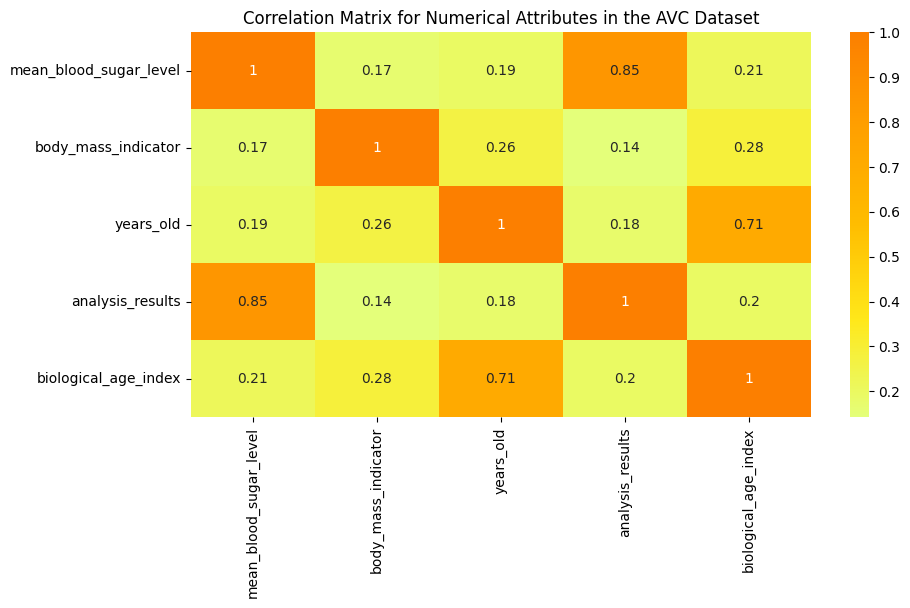

In [63]:
# Correlation Analysis for Numerical Attributes in AVC

# Concatenate training and test sets
full_dataset = pd.concat([AVG_imputed_df, AVC_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

numerical_cols = ['mean_blood_sugar_level', 'body_mass_indicator', 'years_old', 'analysis_results', 'biological_age_index']

# Selecting continuous numerical columns
numerical_data = full_dataset[numerical_cols]

# Calculating the correlation matrix
corr_matrix = numerical_data.corr(method='pearson')

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Wistia')
plt.title('Correlation Matrix for Numerical Attributes in the AVC Dataset')
plt.show()


In [64]:
# Correlation Analysis for Categorical Attributes in AVC

# Concatenate training and test sets
full_dataset = pd.concat([AVG_imputed_df, AVC_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

# Categorical attributes excluding labels
categorical_cols = ['cardiovascular_issues', 'job_category', 'sex', 'tobacco_usage', 'high_blood_pressure', 'married', 'living_area', 'chaotic_sleep']

# Function to perform Chi-Square test
def chi_square_test(df, col1, col2, alpha=0.01):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test for each pair of categorical attributes
significant_correlations = []
alpha = 0.01

for i, attr1 in enumerate(categorical_cols):
    for j, attr2 in enumerate(categorical_cols[i+1:]):
        p_value = chi_square_test(full_dataset, attr1, attr2)
        if p_value < alpha:
            significant_correlations.append((attr1, attr2, p_value))

# Display significant correlations
if significant_correlations:
    print("Significant correlations found between the following attribute pairs:")
    for attr1, attr2, p_value in significant_correlations:
        print(f"Attributes: {attr1} and {attr2}, p-value: {p_value}")
else:
    print("No significant correlations found between categorical attributes.")


Significant correlations found between the following attribute pairs:
Attributes: cardiovascular_issues and job_category, p-value: 1.6131118983010098e-14
Attributes: cardiovascular_issues and sex, p-value: 1.3832686910351161e-09
Attributes: cardiovascular_issues and tobacco_usage, p-value: 1.0945995307120188e-09
Attributes: cardiovascular_issues and high_blood_pressure, p-value: 2.208889768960281e-14
Attributes: cardiovascular_issues and married, p-value: 6.055851847851712e-14
Attributes: cardiovascular_issues and chaotic_sleep, p-value: 0.0
Attributes: job_category and sex, p-value: 1.4808600269832062e-08
Attributes: job_category and tobacco_usage, p-value: 3.103281778486592e-290
Attributes: job_category and high_blood_pressure, p-value: 3.006680768703227e-28
Attributes: job_category and married, p-value: 5.3891295933371026e-294
Attributes: job_category and chaotic_sleep, p-value: 1.6131118983010335e-14
Attributes: sex and tobacco_usage, p-value: 2.0482483061090376e-11
Attributes: sex

# Correlation Analysis SalaryPrediction

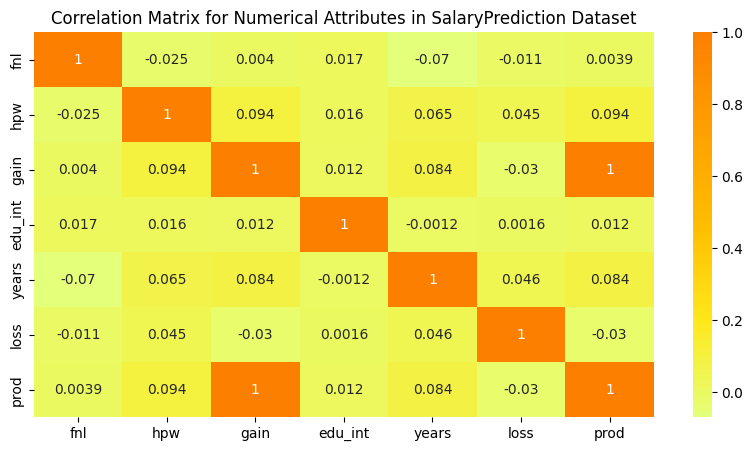

In [65]:
# Correlation Analysis for Numerical Attributes in SalaryPrediction

# Concatenate training and test sets
full_dataset = pd.concat([Salary_imputed_df, Salary_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

# Numerical columns
numerical_cols = ['fnl', 'hpw', 'gain', 'edu_int', 'years', 'loss', 'prod']

# Selecting continuous numerical columns
numerical_data = full_dataset[numerical_cols]

# Calculating the correlation matrix
corr_matrix = numerical_data.corr(method='pearson')

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Wistia')
plt.title('Correlation Matrix for Numerical Attributes in SalaryPrediction Dataset')
plt.show()


In [66]:
# Correlation Analysis for Categorical Attributes in SalaryPrediction

# Concatenate training and test sets
full_dataset = pd.concat([Salary_imputed_df, Salary_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

# Categorical attributes excluding labels
categorical_cols = ['relation', 'country', 'job', 'work_type', 'partner', 'edu', 'gender', 'race', 'gtype']

# Function to perform Chi-Square test
def chi_square_test(df, col1, col2, alpha=0.01):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test for each pair of categorical attributes
significant_correlations = []
alpha = 0.01 / (len(categorical_cols) * (len(categorical_cols) - 1) / 2)  # Bonferroni correction

for i, attr1 in enumerate(categorical_cols):
    for j in range(i + 1, len(categorical_cols)):
        attr2 = categorical_cols[j]
        p_value = chi_square_test(full_dataset, attr1, attr2, alpha)
        if p_value < alpha:
            significant_correlations.append((attr1, attr2, p_value))

# Display significant correlations
if significant_correlations:
    print("Significant correlations found between the following attribute pairs:")
    for attr1, attr2, p_value in significant_correlations:
        print(f"Attributes: {attr1} and {attr2}, p-value: {p_value}")
else:
    print("No significant correlations found between categorical attributes.")


Significant correlations found between the following attribute pairs:
Attributes: relation and country, p-value: 1.9064902796216834e-41
Attributes: relation and job, p-value: 2.1888603446903173e-305
Attributes: relation and work_type, p-value: 1.1291101208189067e-104
Attributes: relation and partner, p-value: 0.0
Attributes: relation and edu, p-value: 5.306209339367513e-127
Attributes: relation and gender, p-value: 0.0
Attributes: relation and race, p-value: 1.697872967927002e-86
Attributes: relation and gtype, p-value: 0.0
Attributes: country and job, p-value: 9.360832417533816e-52
Attributes: country and partner, p-value: 1.7386256132541368e-26
Attributes: country and edu, p-value: 0.0
Attributes: country and race, p-value: 0.0
Attributes: job and work_type, p-value: 0.0
Attributes: job and partner, p-value: 1.810522611758304e-181
Attributes: job and edu, p-value: 0.0
Attributes: job and gender, p-value: 0.0
Attributes: job and race, p-value: 2.7728108056537654e-34
Attributes: job an

# Outliers AVC

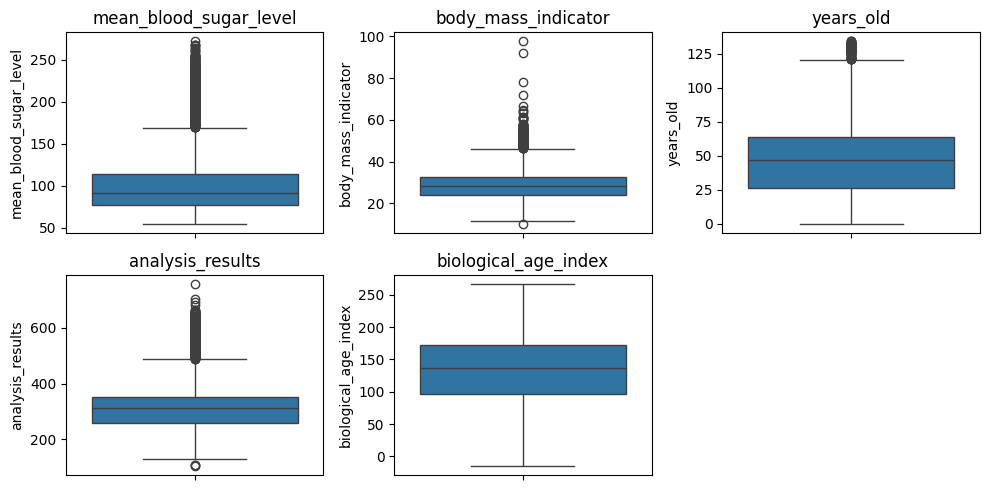

In [67]:
# Outliers in AVC Dataset
full_dataset = pd.concat([AVG_imputed_df, AVC_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

numerical_cols = ['mean_blood_sugar_level', 'body_mass_indicator', 'years_old', 'analysis_results', 'biological_age_index']

# Creating boxplots for each numerical attribute
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=full_dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


# Outliers SalaryPrediction

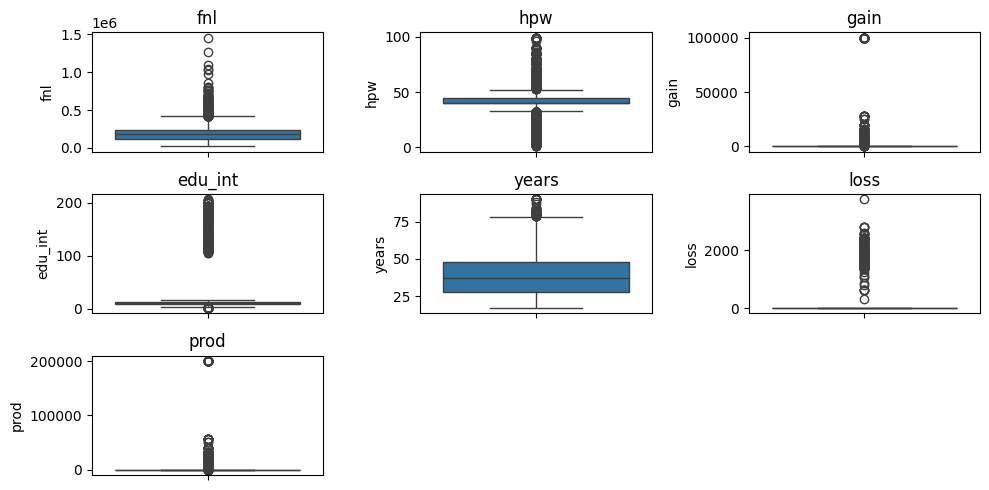

In [68]:
# Outliers in SalaryPrediction Dataset
full_dataset = pd.concat([Salary_imputed_df, Salary_test_df], axis=0)
full_dataset.reset_index(drop=True, inplace=True)

numerical_cols = ['fnl', 'hpw', 'gain', 'edu_int', 'years', 'loss', 'prod']

# Creating boxplots for each numerical attribute
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=full_dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


# Removing Redundant Attributes from AVC Dataset

In [69]:
# Removing Redundant Attributes from AVC Dataset

# Copy the imputed training dataset
AVC_train_reduced_df = AVG_imputed_df.copy()

# Drop redundant columns from the training dataset
AVC_train_reduced_df = AVC_train_reduced_df.drop(columns=['mean_blood_sugar_level', 'biological_age_index', 'cardiovascular_issues'], axis=1)

# Copy the test dataset
AVC_test_reduced_df = AVC_test_df.copy()

# Drop redundant columns from the test dataset
AVC_test_reduced_df = AVC_test_reduced_df.drop(columns=['mean_blood_sugar_level', 'biological_age_index', 'cardiovascular_issues'], axis=1)

# Display information about the reduced training dataset
AVC_train_reduced_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_category              4088 non-null   object 
 1   body_mass_indicator       4088 non-null   float64
 2   sex                       4088 non-null   object 
 3   tobacco_usage             4088 non-null   object 
 4   high_blood_pressure       4088 non-null   int64  
 5   married                   4088 non-null   object 
 6   living_area               4088 non-null   object 
 7   years_old                 4088 non-null   float64
 8   chaotic_sleep             4088 non-null   int64  
 9   analysis_results          4088 non-null   float64
 10  cerebrovascular_accident  4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


# Removing Redundant Attributes from SalaryPrediction Dataset

In [70]:
# Removing Redundant Attributes from SalaryPrediction Dataset

# Copy the imputed training dataset
Salary_train_reduced_df = Salary_imputed_df.copy()

# Drop redundant columns from the training dataset
Salary_train_reduced_df = Salary_train_reduced_df.drop(columns=['prod', 'relation', 'job'], axis=1)

# Copy the test dataset
Salary_test_reduced_df = Salary_test_df.copy()

# Drop redundant columns from the test dataset
Salary_test_reduced_df = Salary_test_reduced_df.drop(columns=['prod', 'relation', 'job'], axis=1)

# Display information about the reduced training dataset
Salary_train_reduced_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fnl        7999 non-null   int64  
 1   hpw        7999 non-null   float64
 2   gain       7999 non-null   int64  
 3   country    7999 non-null   object 
 4   edu_int    7999 non-null   int64  
 5   years      7999 non-null   int64  
 6   loss       7999 non-null   int64  
 7   work_type  7999 non-null   object 
 8   partner    7999 non-null   object 
 9   edu        7999 non-null   object 
 10  gender     7999 non-null   object 
 11  race       7999 non-null   object 
 12  gtype      7999 non-null   object 
 13  money      7999 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 875.0+ KB


# Encoding Categorical Attributes

In [71]:
# Encode text values in the AVC training dataset
for col in AVC_train_reduced_df.columns:
    if AVC_train_reduced_df[col].dtype != 'int64':
        encoded_values, _ = pd.factorize(AVC_train_reduced_df[col])
        AVC_train_reduced_df[col] = encoded_values.astype('int64')

# Encode text values in the AVC test dataset
for col in AVC_test_reduced_df.columns:
    if AVC_test_reduced_df[col].dtype != 'int64':
        encoded_values, _ = pd.factorize(AVC_test_reduced_df[col])
        AVC_test_reduced_df[col] = encoded_values.astype('int64')

# Encode text values in the SalaryPrediction training dataset
for col in Salary_train_reduced_df.columns:
    if Salary_train_reduced_df[col].dtype != 'int64':
        encoded_values, _ = pd.factorize(Salary_train_reduced_df[col])
        Salary_train_reduced_df[col] = encoded_values.astype('int64')

# Encode text values in the SalaryPrediction test dataset
for col in Salary_test_reduced_df.columns:
    if Salary_test_reduced_df[col].dtype != 'int64':
        encoded_values, _ = pd.factorize(Salary_test_reduced_df[col])
        Salary_test_reduced_df[col] = encoded_values.astype('int64')


# Data Scaling

In [72]:
# Initialize the StandardScaler
scaler = StandardScaler()

# AVC Dataset
# Separate the target variable
y_train_AVC = AVC_train_reduced_df['cerebrovascular_accident']
y_test_AVC = AVC_test_reduced_df['cerebrovascular_accident']

# Drop the target variable from the feature set and scale the features
X_train_AVC = AVC_train_reduced_df.drop(columns=['cerebrovascular_accident'], axis=1)
X_train_AVC = scaler.fit_transform(X_train_AVC)

X_test_AVC = AVC_test_reduced_df.drop(columns=['cerebrovascular_accident'], axis=1)
X_test_AVC = scaler.transform(X_test_AVC)  # Use transform instead of fit_transform

# SalaryPrediction Dataset
# Separate the target variable
y_train_Salary = Salary_train_reduced_df['money']
y_test_Salary = Salary_test_reduced_df['money']

# Drop the target variable from the feature set and scale the features
X_train_Salary = Salary_train_reduced_df.drop(columns=['money'], axis=1)
X_train_Salary = scaler.fit_transform(X_train_Salary)

X_test_Salary = Salary_test_reduced_df.drop(columns=['money'], axis=1)
X_test_Salary = scaler.transform(X_test_Salary)  # Use transform instead of fit_transform


# Logical Regression

In [73]:
# Sigmoid function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [74]:
def compute_cost(X, y, w, b, lambda_):
    """
    Compute the cost function for logistic regression with regularization.

    Args:
    X -- Input features, a numpy array of shape (m, n)
    y -- True labels, a numpy array of shape (m,)
    w -- Weights, a numpy array of shape (n,)
    b -- Bias, a scalar
    lambda_ -- Regularization parameter, a scalar

    Returns:
    total_cost -- The total cost including regularization
    """
    m = X.shape[0]  # Number of training examples

    # Compute the linear combination z = Xw + b
    z = np.dot(X, w) + b

    # Compute the sigmoid of z
    f_wb = sigmoid(z)

    # Compute the cost without regularization
    cost_without_reg = -np.mean(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))

    # Compute the regularization cost
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)

    # Compute the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost


In [75]:
def compute_gradient(X, y, w, b, lambda_):
    """
    Compute the gradients for logistic regression with regularization.

    Args:
    X -- Input features, a numpy array of shape (m, n)
    y -- True labels, a numpy array of shape (m,)
    w -- Weights, a numpy array of shape (n,)
    b -- Bias, a scalar
    lambda_ -- Regularization parameter, a scalar

    Returns:
    dj_db -- Gradient of the cost with respect to the bias
    dj_dw -- Gradient of the cost with respect to the weights
    """
    m = X.shape[0]  # Number of training examples

    # Linear combination (z = Xw + b)
    z = X.dot(w) + b

    # Apply the sigmoid function
    predictions = sigmoid(z)

    # Calculate the error term
    error = predictions - y

    # Calculate gradients for weights and bias
    dj_dw = (X.T.dot(error) / m) + (lambda_ * w / m)
    dj_db = np.mean(error)

    return dj_db, dj_dw


In [76]:
def gradient_descent(X, y, w, b, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Perform gradient descent to learn the weights and bias.

    Args:
    X -- Input features, a numpy array of shape (m, n)
    y -- True labels, a numpy array of shape (m,)
    w -- Initial weights, a numpy array of shape (n,)
    b -- Initial bias, a scalar
    cost_function -- Function to compute the cost
    gradient_function -- Function to compute the gradient
    alpha -- Learning rate, a scalar
    num_iters -- Number of iterations for gradient descent
    lambda_ -- Regularization parameter, a scalar

    Returns:
    w -- Learned weights, a numpy array of shape (n,)
    b -- Learned bias, a scalar
    J_history -- List of cost values at each iteration
    w_history -- List of weights at each iteration
    """
    # Number of training examples
    m = len(X)

    # Lists to store the cost and weights at each iteration for later use
    J_history = []
    w_history = []

    for i in range(num_iters):
        # Calculate the gradient
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)

        # Update parameters using the calculated gradients and learning rate
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save the cost at each iteration
        if i < 100000:  # Prevent resource exhaustion
            cost = cost_function(X, y, w, b, lambda_)
            J_history.append(cost)

        # Print the cost at regular intervals
        if i % (num_iters // 10) == 0 or i == (num_iters - 1):
            w_history.append(w.copy())  # Use w.copy() to avoid reference issues
            print(f"Iteration {i:4}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history, w_history  # Return the final parameters and history


In [77]:
def predict(X, w, b):
    """
    Predict binary labels for input features X using logistic regression parameters w and b.

    Args:
    X -- Input features, a numpy array of shape (m, n)
    w -- Weights, a numpy array of shape (n,)
    b -- Bias, a scalar

    Returns:
    p -- Predicted labels, a numpy array of shape (m,)
    """
    # Compute the linear combination z = Xw + b
    z = np.dot(X, w) + b

    # Compute the sigmoid of z
    f_wb = sigmoid(z)

    # Apply the threshold to get binary predictions
    p = (f_wb >= 0.5).astype(int)

    return p

# AVC Dataset Evaluation

In [78]:
# Set a random seed for reproducibility
np.random.seed(1)

# Number of features in the dataset
num_features = 10

# Initialize weights and bias
initial_w = 0.01 * (np.random.rand(num_features) - 0.5)
initial_b = -8

# Gradient descent settings
iterations = 4000
alpha = 0.1

# Perform gradient descent
w_train_AVC, b_train_AVC, J_history, _ = gradient_descent(
    X_train_AVC, y_train_AVC, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations, 5e-3
)

Iteration    0: Cost     0.34
Iteration  400: Cost     0.22
Iteration  800: Cost     0.19
Iteration 1200: Cost     0.17
Iteration 1600: Cost     0.17
Iteration 2000: Cost     0.16
Iteration 2400: Cost     0.16
Iteration 2800: Cost     0.16
Iteration 3200: Cost     0.16
Iteration 3600: Cost     0.16
Iteration 3999: Cost     0.16


In [79]:
# Set a random seed for reproducibility
np.random.seed(1)

# Number of features in the dataset
num_features = 10

# Initialize weights and bias
initial_w = 0.01 * (np.random.rand(num_features) - 0.5)
initial_b = -8

# Gradient descent settings
iterations = 4000
alpha = 0.05

# Perform gradient descent on the test dataset
w_test_AVC, b_test_AVC, J_history, _ = gradient_descent(
    X_test_AVC, y_test_AVC, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations, 5e-3
)


Iteration    0: Cost     0.59
Iteration  400: Cost     0.32
Iteration  800: Cost     0.27
Iteration 1200: Cost     0.25
Iteration 1600: Cost     0.25
Iteration 2000: Cost     0.25
Iteration 2400: Cost     0.24
Iteration 2800: Cost     0.24
Iteration 3200: Cost     0.24
Iteration 3600: Cost     0.24
Iteration 3999: Cost     0.24


# AVC Predictions

In [80]:
# Make predictions on the training and test sets
y_pred_train_AVC = predict(X_train_AVC, w_train_AVC, b_train_AVC)
y_pred_test_AVC = predict(X_test_AVC, w_test_AVC, b_test_AVC)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_AVC, y_pred_train_AVC)
test_accuracy = accuracy_score(y_test_AVC, y_pred_test_AVC)

# Calculate other metrics (precision, recall, f1-score)
precision = precision_score(y_test_AVC, y_pred_test_AVC)
recall = recall_score(y_test_AVC, y_pred_test_AVC)
f1 = f1_score(y_test_AVC, y_pred_test_AVC)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.9574363992172211
Test Accuracy: 0.9285714285714286
Precision: 0.75
Recall: 0.04
F1 Score: 0.07594936708860758


# SalaryPrediction Dataset Evaluation

In [81]:
# Set a random seed for reproducibility
np.random.seed(1)

# Number of features in the dataset
num_features = 13

# Initialize weights and bias
initial_w = 0.01 * (np.random.rand(num_features) - 0.5)
initial_b = -8

# Gradient descent settings
iterations = 3000
alpha = 0.05

# Perform gradient descent
w_train_Salary, b_train_Salary, J_history, _ = gradient_descent(
    X_train_Salary, y_train_Salary, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations, 5e-3
)


Iteration    0: Cost     1.92
Iteration  300: Cost     0.78
Iteration  600: Cost     0.59
Iteration  900: Cost     0.50
Iteration 1200: Cost     0.46
Iteration 1500: Cost     0.45
Iteration 1800: Cost     0.45
Iteration 2100: Cost     0.45
Iteration 2400: Cost     0.44
Iteration 2700: Cost     0.44
Iteration 2999: Cost     0.44


In [82]:
# Set a random seed for reproducibility
np.random.seed(1)

# Number of features in the dataset
num_features = 13

# Initialize weights and bias
initial_w = 0.01 * (np.random.rand(num_features) - 0.5)
initial_b = -8

# Gradient descent settings
iterations = 3000
alpha = 0.05

# Perform gradient descent on the test dataset
w_test_Salary, b_test_Salary, J_history, _ = gradient_descent(
    X_test_Salary, y_test_Salary, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations, 5e-3
)


Iteration    0: Cost     1.91
Iteration  300: Cost     0.48
Iteration  600: Cost     0.45
Iteration  900: Cost     0.44
Iteration 1200: Cost     0.43
Iteration 1500: Cost     0.42
Iteration 1800: Cost     0.42
Iteration 2100: Cost     0.41
Iteration 2400: Cost     0.41
Iteration 2700: Cost     0.41
Iteration 2999: Cost     0.40


# SalaryPrediction Predictions

In [83]:
# Make predictions on the training and test sets
y_pred_train_Salary = predict(X_train_Salary, w_train_Salary, b_train_Salary)
y_pred_test_Salary = predict(X_test_Salary, w_test_Salary, b_test_Salary)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_Salary, y_pred_train_Salary)
test_accuracy = accuracy_score(y_test_Salary, y_pred_test_Salary)

# Calculate other metrics (precision, recall, f1-score)
precision = precision_score(y_test_Salary, y_pred_test_Salary)
recall = recall_score(y_test_Salary, y_pred_test_Salary)
f1 = f1_score(y_test_Salary, y_pred_test_Salary)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.7979747468433555
Test Accuracy: 0.7985
Precision: 0.6320754716981132
Recall: 0.4127310061601643
F1 Score: 0.49937888198757757


# Logistic Regresion with Sikit-Learn AVC

In [84]:
# Initialize the Logistic Regression model with specified parameters
# C is the inverse of regularization strength; smaller values specify stronger regularization
# max_iter is the maximum number of iterations taken for the solvers to converge
lr_model = LogisticRegression(C=5e-3, max_iter=10000)

# Fit the model to the training data (X_train_AVC, y_train_AVC)
# This trains the model to learn the relationship between the input features and the target labels
lr_model.fit(X_train_AVC, y_train_AVC)

# Fit the model to the test data (X_test_AVC, y_test_AVC)
lr_model.fit(X_test_AVC, y_test_AVC)


LogisticRegression(C=0.005, max_iter=10000)

In [85]:
# Print the accuracy of the model on the training set
training_accuracy = lr_model.score(X_train_AVC, y_train_AVC)
print("Accuracy on training set:", training_accuracy)

# Print the accuracy of the model on the test set
test_accuracy = lr_model.score(X_test_AVC, y_test_AVC)
print("Accuracy on test set:", test_accuracy)

# Predict the labels for the test set
y_pred = lr_model.predict(X_test_AVC)

# Generate a classification report which includes precision, recall, and F1-score for each class
# target_names specifies the names of the target classes
report = classification_report(y_test_AVC, y_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print(report)


Accuracy on training set: 0.9574363992172211
Accuracy on test set: 0.9266144814090019
              precision    recall  f1-score   support

     Class 0       0.93      1.00      0.96       947
     Class 1       0.00      0.00      0.00        75

    accuracy                           0.93      1022
   macro avg       0.46      0.50      0.48      1022
weighted avg       0.86      0.93      0.89      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regresion with Sikit-Learn SalaryPrediction

In [86]:
# Initialize the Logistic Regression model with specified parameters
# C is the inverse of regularization strength; smaller values specify stronger regularization
# max_iter is the maximum number of iterations taken for the solvers to converge
lr_model = LogisticRegression(C=5e-3, max_iter=10000)

# Fit the model to the training data (X_train_Salary, y_train_Salary)
# This trains the model to learn the relationship between the input features and the target labels
lr_model.fit(X_train_Salary, y_train_Salary)

# Fit the model to the test data (X_test_Salary, y_test_Salary)
lr_model.fit(X_test_Salary, y_test_Salary)


LogisticRegression(C=0.005, max_iter=10000)

In [87]:
# Print the accuracy of the model on the training set
training_accuracy = lr_model.score(X_train_Salary, y_train_Salary)
print("Accuracy on training set:", training_accuracy)

# Print the accuracy of the model on the test set
test_accuracy = lr_model.score(X_test_Salary, y_test_Salary)
print("Accuracy on test set:", test_accuracy)

# Predict the labels for the test set
y_pred = lr_model.predict(X_test_Salary)

# Generate a classification report which includes precision, recall, and F1-score for each class
# target_names specifies the names of the target classes
report = classification_report(y_test_Salary, y_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print(report)


Accuracy on training set: 0.7645955744468058
Accuracy on test set: 0.782
              precision    recall  f1-score   support

     Class 0       0.79      0.98      0.87      1513
     Class 1       0.71      0.18      0.28       487

    accuracy                           0.78      2000
   macro avg       0.75      0.58      0.58      2000
weighted avg       0.77      0.78      0.73      2000



# Logistic Regression Performance AVC

In [88]:
# Define the columns
columns = ["Algorithm", "Lambda", "Learning_Rate", "Train_Accuracy", "Test_Accuracy",
           "Precision_Class0", "Precision_Class1", "Recall_Class0", "Recall_Class1",
           "F1_Class0", "F1_Class1", "Epoch_Convergence"]

# Create an empty dataframe with the specified columns
Table_Performance = pd.DataFrame(columns=columns)

# Example data
test_data01 = {
        "Algorithm": "Regresie_Logistică",
        "Lambda": 0,
        "Learning_Rate": 0.01,
        "Train_Accuracy": 0.955,
        "Test_Accuracy": 0.926,
        "Precision_Class0": 0.929,
        "Precision_Class1": 0.5,
        "Recall_Class0": 0.996,
        "Recall_Class1": 0.04,
        "F1_Class0": 0.961,
        "F1_Class1": 0.074,
        "Epoch_Convergence": 9000
}

test_data02 = {
        "Algorithm": "Regresie_Logistică",
        "Lambda": 5e-3,
        "Learning_Rate": 0.01,
        "Train_Accuracy": 0.955,
        "Test_Accuracy": 0.926,
        "Precision_Class0": 0.929,
        "Precision_Class1": 0.5,
        "Recall_Class0": 0.996,
        "Recall_Class1": 0.04,
        "F1_Class0": 0.961,
        "F1_Class1": 0.074,
        "Epoch_Convergence": 9000
}

test_data03 = {
        "Algorithm": "Regresie_Logistică",
        "Lambda": 5e-3,
        "Learning_Rate": 0.05,
        "Train_Accuracy": 0.955,
        "Test_Accuracy": 0.926,
        "Precision_Class0": 0.929,
        "Precision_Class1": 0.5,
        "Recall_Class0": 0.996,
        "Recall_Class1": 0.04,
        "F1_Class0": 0.961,
        "F1_Class1": 0.074,
        "Epoch_Convergence": 4500
}

test_data04 = {
        "Algorithm": "Regresie_Logistică Sikit-Learn",
        "Lambda": 0,
        "Learning_Rate": '-',
        "Train_Accuracy": 0.957,
        "Test_Accuracy": 0.926,
        "Precision_Class0": 0.93,
        "Precision_Class1": 0.00,
        "Recall_Class0": 1.00,
        "Recall_Class1": 0.00,
        "F1_Class0": 0.96,
        "F1_Class1": 0.00,
        "Epoch_Convergence": '-'
}

test_data05 = {
        "Algorithm": "Regresie_Logistică Sikit-Learn",
        "Lambda": 5e-13,
        "Learning_Rate": '-',
        "Train_Accuracy": 0.957,
        "Test_Accuracy": 0.926,
        "Precision_Class0": 0.93,
        "Precision_Class1": 0.00,
        "Recall_Class0": 1.00,
        "Recall_Class1": 0.00,
        "F1_Class0": 0.96,
        "F1_Class1": 0.00,
        "Epoch_Convergence": '-'
}

# Append the data to the DataFrame
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data01, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data02, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data03, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data04, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data05, index=[0])], ignore_index=True)

Table_Performance


,Algorithm,Lambda,Learning_Rate,Train_Accuracy,Test_Accuracy,Precision_Class0,Precision_Class1,Recall_Class0,Recall_Class1,F1_Class0,F1_Class1,Epoch_Convergence
0,Regresie_Logistică,0,0.01,0.955,0.926,0.929,0.5,0.996,0.04,0.961,0.074,9000
1,Regresie_Logistică,0.005,0.01,0.955,0.926,0.929,0.5,0.996,0.04,0.961,0.074,9000
2,Regresie_Logistică,0.005,0.05,0.955,0.926,0.929,0.5,0.996,0.04,0.961,0.074,4500
3,Regresie_Logistică Sikit-Learn,0,-,0.957,0.926,0.930,0.0,1.000,0.00,0.960,0.000,-
4,Regresie_Logistică Sikit-Learn,0.0,-,0.957,0.926,0.930,0.0,1.000,0.00,0.960,0.000,-


# Logistic Regression Performance SalaryPrediction

In [89]:
# Define the columns
columns = ["Algorithm", "Lambda", "Learning_Rate", "Train_Accuracy", "Test_Accuracy",
           "Precision_Class0", "Precision_Class1", "Recall_Class0", "Recall_Class1",
           "F1_Class0", "F1_Class1", "Epoch_Convergence"]

# Create an empty dataframe with the specified columns
Table_Performance = pd.DataFrame(columns=columns)

# Example data
test_data01 = {
    "Algorithm": "Regresie_Logistică",
    "Lambda": 0,
    "Learning_Rate": 0.01,
    "Train_Accuracy": 0.796,
    "Test_Accuracy": 0.801,
    "Precision_Class0": 0.827,
    "Precision_Class1": 0.648,
    "Recall_Class0": 0.930,
    "Recall_Class1": 0.398,
    "F1_Class0": 0.876,
    "F1_Class1": 0.493,
    "Epoch_Convergence": 7000
}

test_data02 = {
    "Algorithm": "Regresie_Logistică",
    "Lambda": 5e-3,
    "Learning_Rate": 0.01,
    "Train_Accuracy": 0.796,
    "Test_Accuracy": 0.801,
    "Precision_Class0": 0.827,
    "Precision_Class1": 0.648,
    "Recall_Class0": 0.930,
    "Recall_Class1": 0.398,
    "F1_Class0": 0.876,
    "F1_Class1": 0.493,
    "Epoch_Convergence": 7000
}


test_data03 = {
    "Algorithm": "Regresie_Logistică",
    "Lambda": 5e-3,
    "Learning_Rate": 0.05,
    "Train_Accuracy": 0.797,
    "Test_Accuracy": 0.799,
    "Precision_Class0": 0.825,
    "Precision_Class1": 0.645,
    "Recall_Class0": 0.931,
    "Recall_Class1": 0.388,
    "F1_Class0": 0.875,
    "F1_Class1": 0.484,
    "Epoch_Convergence": 2100
}

test_data04 = {
    "Algorithm": "Regresie_Logistică Sikit-Learn",
    "Lambda": 0,
    "Learning_Rate": '-',
    "Train_Accuracy": 0.724,
    "Test_Accuracy": 0.802,
    "Precision_Class0": 0.83 ,
    "Precision_Class1": 0.66 ,
    "Recall_Class0": 0.93,
    "Recall_Class1": 0.39,
    "F1_Class0": 0.88,
    "F1_Class1": 0.49,
    "Epoch_Convergence": '-'
}


test_data05 = {
    "Algorithm": "Regresie_Logistică Sikit-Learn",
    "Lambda": 5e-13,
    "Learning_Rate": '-',
    "Train_Accuracy": 0.754,
    "Test_Accuracy": 0.785,
    "Precision_Class0": 0.79,
    "Precision_Class1": 0.76 ,
    "Recall_Class0": 0.98,
    "Recall_Class1": 0.17,
    "F1_Class0": 0.87 ,
    "F1_Class1": 0.28,
    "Epoch_Convergence": '-'
}

# Append the data to the DataFrame
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data01, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data02, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data03, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data04, index=[0])], ignore_index=True)
Table_Performance = pd.concat([Table_Performance, pd.DataFrame(test_data05, index=[0])], ignore_index=True)

Table_Performance


,Algorithm,Lambda,Learning_Rate,Train_Accuracy,Test_Accuracy,Precision_Class0,Precision_Class1,Recall_Class0,Recall_Class1,F1_Class0,F1_Class1,Epoch_Convergence
0,Regresie_Logistică,0,0.01,0.796,0.801,0.827,0.648,0.930,0.398,0.876,0.493,7000
1,Regresie_Logistică,0.005,0.01,0.796,0.801,0.827,0.648,0.930,0.398,0.876,0.493,7000
2,Regresie_Logistică,0.005,0.05,0.797,0.799,0.825,0.645,0.931,0.388,0.875,0.484,2100
3,Regresie_Logistică Sikit-Learn,0,-,0.724,0.802,0.830,0.660,0.930,0.390,0.880,0.490,-
4,Regresie_Logistică Sikit-Learn,0.0,-,0.754,0.785,0.790,0.760,0.980,0.170,0.870,0.280,-


# Confusion Matrix

In [90]:
def plot_confusion_matrix_for_class(conf_matrix, class_label):
    """
    Plots the confusion matrix for a specific class.

    Parameters:
    conf_matrix (np.ndarray): Confusion matrix of shape (2, 2).
    class_label (str): Label of the class for which the confusion matrix is plotted.
    """
    fig, ax = plt.subplots(figsize=(5, 4))
    conf_matrix_img = ax.matshow(conf_matrix, cmap='Pastel1')

    # Add the number of examples on each metric
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            example_count = conf_matrix[i, j]
            text_label = ("TN" if i == 0 and j == 0 else
                          "FN" if i == 0 and j == 1 else
                          "FP" if i == 1 and j == 0 else
                          "TP")
            ax.text(x=j, y=i, s=f"{example_count}\n({text_label})",
                    ha="center", va="center", color="black")

    # Add labels and title
    ax.set_title(f'Confusion Matrix - Class {class_label}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticks(np.arange(2))
    ax.set_yticklabels(['Negative', 'Positive'])

    # Add colorbar
    plt.colorbar(conf_matrix_img)
    plt.show()

# Confusion Matrix AVC

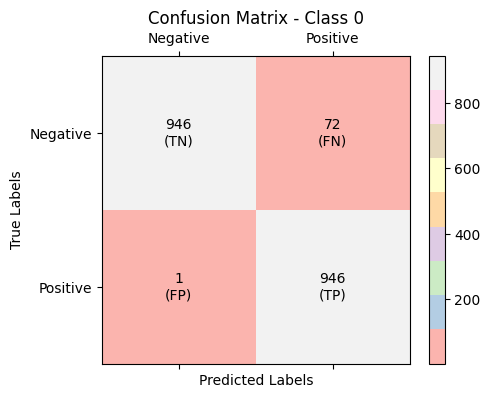

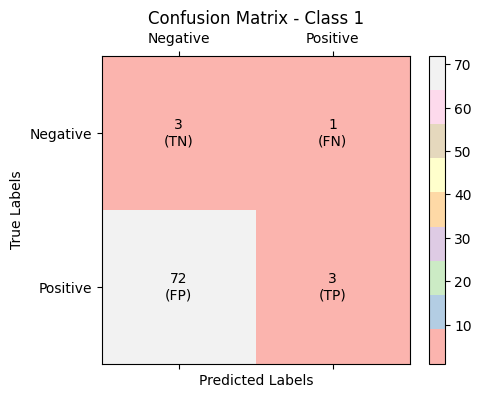

In [91]:
# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test_AVC, y_pred_test_AVC)

# Get unique classes
unique_classes = sorted(set(y_test_AVC))

# Initialize dictionaries to store FN, TN, FP, TP values for each class
class_metrics = {'Class': unique_classes, 'FN': [], 'TN': [], 'FP': [], 'TP': []}

# Iterate through each class
for i in unique_classes:
    # Calculate FN, TN, FP, TP values
    TN = np.sum(np.logical_and(y_test_AVC == i, y_pred_test_AVC == i))
    FP = np.sum(np.logical_and(y_test_AVC != i, y_pred_test_AVC == i))
    FN = np.sum(np.logical_and(y_test_AVC == i, y_pred_test_AVC != i))
    TP = np.sum(np.logical_and(y_test_AVC == i, y_pred_test_AVC == i))

    # Append values to dictionary
    class_metrics['FN'].append(FN)
    class_metrics['TN'].append(TN)
    class_metrics['FP'].append(FP)
    class_metrics['TP'].append(TP)

# Convert dictionary to DataFrame
class_metrics_df = pd.DataFrame(class_metrics)

# Plot confusion matrix for each class
for i, class_label in enumerate(unique_classes):
    conf_matrix_class = np.array([[class_metrics_df.loc[i, 'TN'], class_metrics_df.loc[i, 'FP']],
                                  [class_metrics_df.loc[i, 'FN'], class_metrics_df.loc[i, 'TP']]])
    plot_confusion_matrix_for_class(conf_matrix_class, class_label)

# Confusion Matrix SalaryPrediction

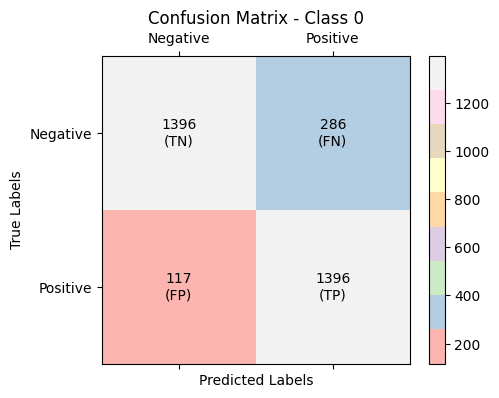

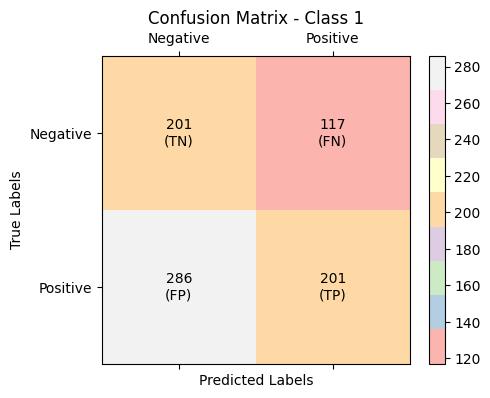

In [92]:
# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test_Salary, y_pred_test_Salary)

# Get unique classes
unique_classes = sorted(set(y_test_Salary))

# Initialize dictionaries to store FN, TN, FP, TP values for each class
class_metrics = {'Class': unique_classes, 'FN': [], 'TN': [], 'FP': [], 'TP': []}

# Iterate through each class
for i in unique_classes:
    # Calculate FN, TN, FP, TP values
    TN = np.sum(np.logical_and(y_test_Salary == i, y_pred_test_Salary == i))
    FP = np.sum(np.logical_and(y_test_Salary != i, y_pred_test_Salary == i))
    FN = np.sum(np.logical_and(y_test_Salary == i, y_pred_test_Salary != i))
    TP = np.sum(np.logical_and(y_test_Salary == i, y_pred_test_Salary == i))

    # Append values to dictionary
    class_metrics['FN'].append(FN)
    class_metrics['TN'].append(TN)
    class_metrics['FP'].append(FP)
    class_metrics['TP'].append(TP)

# Convert dictionary to DataFrame
class_metrics_df = pd.DataFrame(class_metrics)

# Plot confusion matrix for each class
for i, class_label in enumerate(unique_classes):
    conf_matrix_class = np.array([[class_metrics_df.loc[i, 'TN'], class_metrics_df.loc[i, 'FP']],
                                  [class_metrics_df.loc[i, 'FN'], class_metrics_df.loc[i, 'TP']]])
    plot_confusion_matrix_for_class(conf_matrix_class, class_label)